In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from skimage.io import imshow
from datetime import datetime
from random import randint
import vgg16

import utils

testNUM = 3
imageNUM = 18
list_loc = 'hanseul_data.txt' #data list
data_loc = 'hanseul'

label_list = ['person','cat','dog','car','boat']
img = np.ndarray(shape=(testNUM,224,224,3), dtype=float)

In [2]:
#the number of image data
with open(list_loc,'r') as f:
    count = 0
    while True:
        file_list = f.readline()
        if not file_list:
            break
        count +=1
    print(count)

1682


In [2]:
def image_print(fig, i, img, name):
    #add column for print input images
    ax = fig.add_subplot(1, imageNUM, 1 + i, xticks=[], yticks=[])
    #add title that is probable name of type
    ax.set_title(name)
    plt.imshow(img)

In [4]:
# valid data set
with open(list_loc,'r') as f:
    file_list = f.readlines()
    for i in range(testNUM):
        k = randint(0,imageNUM-1) + 1664
        img[i] = utils.load_image(file_list[k][:-3])
        print(file_list[k][:-3],"is selected")

batch = img

hanseul\n2\n2_269.JPEG is selected
hanseul\n3\n3_191.JPEG is selected
hanseul\n2\n2_230.JPEG is selected


C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


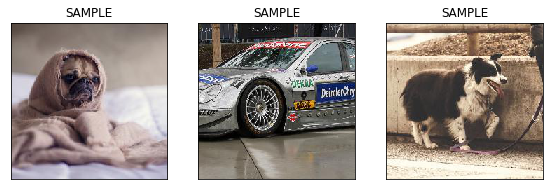

In [5]:
#print sample data
fig = plt.figure(figsize=(60,testNUM))
for i in range(testNUM):
    image_print(fig,i,img[i],"SAMPLE")


program is started
INFO:tensorflow:Restoring parameters from TL_ckpt\TL-model-19968
2018-07-26 23:26:01.085809  Running starts!
2018-07-26 23:26:03.779963  Running finished!


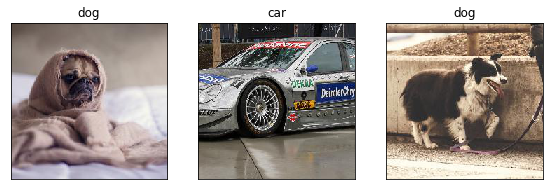

In [8]:
with tf.Session(config=tf.ConfigProto(gpu_options=(tf.GPUOptions(per_process_gpu_memory_fraction=0.8)))) as sess:
        print('program is started')
        
        #Load meta graph
        saver = tf.train.import_meta_graph(os.path.join('TL_ckpt','TL-model-19968.meta'))
        
        #Load weights
        saver.restore(sess, tf.train.latest_checkpoint('TL_ckpt'))
        #make graph
        graph = tf.get_default_graph()
        
        # If you don't know name of variables, remove '''''' 
        '''
        for op in graph.get_operations():
            print(op.name)
        '''
        
        #Fix input and ouput
        inputs = graph.get_tensor_by_name("images:0")
        prob = graph.get_tensor_by_name("content_vgg/fc8/probability:0")
        
        feed_dict = {inputs: batch}

        print(datetime.now(),' Running starts!')
        prob = sess.run(prob, feed_dict=feed_dict)
        print(datetime.now(),' Running finished!')
        
        #Show test image and which label AI decided
        fig = plt.figure(figsize=(60,testNUM))
        for i in range(testNUM):
            pred = np.argsort(prob[i])[::-1]
            name = label_list[pred[0]]
            image_print(fig, i, img[i], name)
